####################################################################

Sentiment analysis on Twitter Dataset

####################################################################

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.2 MB/s 


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#using sncrepar 

import snscrape.modules.twitter as sntwitter
import pandas as pd

query ="Formula 1 racing "
tweets = []
limit =2000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
        
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'text'])
print(df)

# to save to csv
df.to_csv('F1tweets2000.csv')

<ipython-input-10-67a6190f302d>:19: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])


                          Date             User  \
0    2022-12-31 03:01:05+00:00  SpeedGRIDRacing   
1    2022-12-31 02:31:48+00:00       Garrett51D   
2    2022-12-30 23:14:48+00:00     Mvalente2021   
3    2022-12-30 22:52:55+00:00       GPAmericas   
4    2022-12-30 22:20:38+00:00         Tertulis   
...                        ...              ...   
1995 2022-12-01 00:25:54+00:00        jorgardur   
1996 2022-11-30 23:25:04+00:00       F1LasVegas   
1997 2022-11-30 22:37:54+00:00   Vax_Merstappen   
1998 2022-11-30 22:31:48+00:00      zoelondondj   
1999 2022-11-30 22:03:59+00:00   SexyBrigadeiro   

                                                   text  
0     Formula 1 🏎  GRID Racing 🏁: 😱 Acaba 2022, ante...  
1     The Formula 1 Activity Book For Kids Aged 6-14...  
2     @akheriaty If formula 1 racing can't be sponso...  
3     @brettmayes @BruceMartin_500 @F1 @COTA @IndyCa...  
4     Regulasi 2023, Desain Red Bull Racing RB18 jad...  
...                                    

In [ ]:

# download dataset Using twitter API
import requests
import csv

# set up the Twitter API client
api_key = "vdEXaZXVQ3ciVJCEN7zYidHWj"
api_key_secret = "eQbxFp8mHokTjGhBT6A6NMiS6ZbrrnvKkJ3ItgqFNoxg1arExr"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAOAWkwEAAAAA%2BKuRMbFT8Isr669QzVIO2h8CUAM%3DsR3kxbxdkHw2yYIWDRXJK4507A95tX4uJpQA0vdxCHfDO0Cv27"

#Topic input from user
topic = input("Enter the topic of the tweets: ")
# search for tweets containing the keyword "dataset"
url = f"https://api.twitter.com/2/tweets/search/recent?query=lang:en%20{topic}"
headers = {
    "Authorization": f"Bearer {bearer_token}",
    "User-Agent": "MyApp/1.0"
}
params = {
    "max_results": "100" # not getting more than 100------------------
}
response = requests.get(url, headers=headers, params=params)

# create a CSV file for writing
csv_file = open("tweet_dataset2.csv", "w", newline="")
writer = csv.writer(csv_file)

# write the header row
writer.writerow([ "text"])# enter fiels that you want

# write the tweets to the CSV file
for tweet in response.json()["data"]:
    writer.writerow([ tweet["text"]])

# close the CSV file
csv_file.close()

print("Done!")

Enter the topic of the tweets: Rishabh pant
Done!


In [ ]:
#preprocess data and save it into file

import pandas as pd
import re
import csv

# get the dataset file name from the user
file_name = input("Enter the dataset file name: ")

# read the dataset file into a Pandas dataframe
df = pd.read_csv(file_name)

# create a new column for preprocessed text
df['preprocessed_text'] = df['text'].apply(lambda x: x)

# preprocess the text
for index, row in df.iterrows():
    # remove URLs
    row['preprocessed_text'] = re.sub(r"http\S+", "", row['preprocessed_text'])
    # remove Twitter handles
    row['preprocessed_text'] = re.sub(r"@\S+", "", row['preprocessed_text'])
    # remove hashtags
    row['preprocessed_text'] = re.sub(r"#\S+", "", row['preprocessed_text'])
    # remove special characters and digits
    row['preprocessed_text'] = re.sub(r"[^a-zA-Z]", " ", row['preprocessed_text'])
    # make all text lowercase
    row['preprocessed_text'] = row['preprocessed_text'].lower()

# create a CSV file for writing
csv_file = open("preprocessed_text1.csv", "w", newline="")
writer = csv.writer(csv_file)

# write the header row
writer.writerow(["preprocessed_text"])

# write the preprocessed text to the CSV file
for index, row in df.iterrows():
    writer.writerow([row['preprocessed_text']])

# close the CSV file
csv_file.close()

print("Done!")

Enter the dataset file name: /content/tweet_dataset2.csv
Done!


In [ ]:
import nltk
 

In [ ]:
 nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#create and download  score file

import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import urllib.request

# prompt user for file path
file_path = input("Enter file path for dataset: ")
# read the dataset file into a Pandas dataframe
df = pd.read_csv(file_path)

# create a new column for preprocessed text
df['preprocessed_text'] = df['preprocessed_text'].apply(lambda x: x)

# preprocess the text
for index, row in df.iterrows():
    # remove URLs
    row['preprocessed_text'] = re.sub(r"http\S+", "", row['preprocessed_text'])#(Pattern ,replacement ,string)
    # remove Twitter handles
    row['preprocessed_text'] = re.sub(r"@\S+", "", row['preprocessed_text'])
    # remove hashtags
    row['preprocessed_text'] = re.sub(r"#\S+", "", row['preprocessed_text'])
    # remove special characters and digits
    row['preprocessed_text'] = re.sub(r"[^a-zA-Z]", " ", row['preprocessed_text'])
    # make all text lowercase
    row['preprocessed_text'] = row['preprocessed_text'].lower()

# create a new column for sentiment scores
df['sentiment_score'] = df['preprocessed_text'].apply(lambda x: x)

# initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# compute the sentiment scores
for index, row in df.iterrows():
    scores = sid.polarity_scores(row['preprocessed_text'])
    row['sentiment_score'] = scores['compound']

# create a CSV file for writing
csv_file = open("sentiment_scores1.csv", "w", newline="")
writer = csv.writer(csv_file)

# write the header row
writer.writerow(["sentiment", "score"])

# write the sentiment scores to the CSV file
for index, row in df.iterrows():
    if row['sentiment_score'] >0:
        writer.writerow(["positive", row['sentiment_score']])
    elif row['sentiment_score'] == 0:
        writer.writerow(["neutral", row['sentiment_score']])
    else:
        writer.writerow(["negative", row['sentiment_score']])

# close the CSV file
csv_file.close()

# download the CSV file
#urllib.request.urlretrieve("sentiment_scores.csv", "sentiment_scores.csv")

print("Done!")


Enter file path for dataset: /content/preprocessed_text1.csv
Done!


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


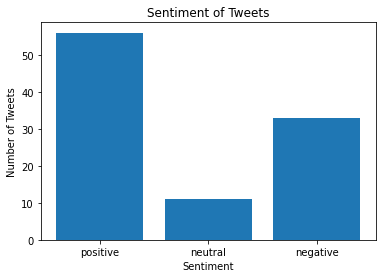

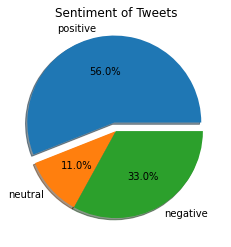

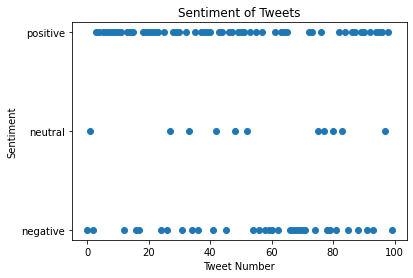

In [ ]:
#successfully plot code

import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# read the preprocessed tweet dataset from the CSV file
tweet_dataset = []
with open("sentiment_scores1.csv", "r") as csv_file:
    reader = csv.reader(csv_file)
    next(reader)  # skip the header row
    for row in reader:
        tweet_dataset.append(row[0])

# analyze the sentiment of each tweet
scores = []
for tweet in tweet_dataset:
    score = sia.polarity_scores(tweet)
    if score["compound"] > 0.5:
        scores.append("positive")
    elif score["compound"] < -0.5:
        scores.append("negative")
    else:
        scores.append("neutral")

# count the number of tweets in each sentiment category
positive_count = sum(1 for score in scores if score == "positive")
neutral_count = sum(1 for score in scores if score == "neutral")
negative_count = sum(1 for score in scores if score == "negative")

# plot the bar graph
x = ["positive", "neutral", "negative"]
y = [positive_count, neutral_count, negative_count]
plt.bar(x, y)
plt.title("Sentiment of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

# plot the pie chart
labels = ["positive", "neutral", "negative"]
sizes = [positive_count, neutral_count, negative_count]
explode = [0.1, 0, 0]
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Sentiment of Tweets")
plt.show()

# plot the scatter plot
x = range(len(tweet_dataset))
y = scores
plt.scatter(x, y)
plt.title("Sentiment of Tweets")
plt.xlabel("Tweet Number")
plt.ylabel("Sentiment")
plt.show()





[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


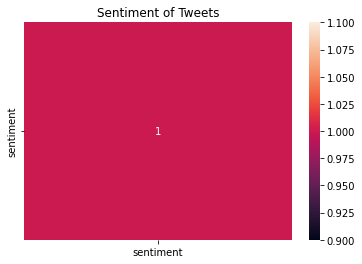

In [ ]:
#Heat Map

import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

# create the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# read the preprocessed tweet dataset from the CSV file
tweet_dataset = []
with open("sentiment_scores1.csv", "r") as csv_file:
    reader = csv.reader(csv_file)
    next(reader)  # skip the header row
    for row in reader:
        tweet_dataset.append(row[0])

# analyze the sentiment of each tweet
scores = []
for tweet in tweet_dataset:
    score = sia.polarity_scores(tweet)
    if score["compound"] > 0.5:
        scores.append(1)  # positive
    elif score["compound"] < -0.5:
        scores.append(-1)  # negative
    else:
        scores.append(0.1)  # neutral

# create the heat map data
data = {"tweet": tweet_dataset, "sentiment": scores}
df = pd.DataFrame(data)

# plot the heat map
sns.heatmap(df.corr(), annot=True)
plt.title("Sentiment of Tweets")
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


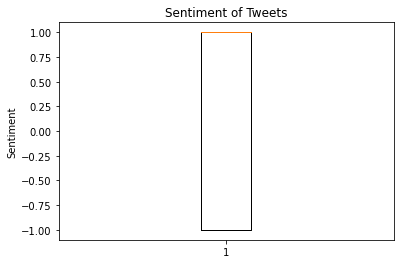

In [ ]:
#Box Plot

import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# read the preprocessed tweet dataset from the CSV file
tweet_dataset = []
with open("sentiment_scores1.csv", "r") as csv_file:
    reader = csv.reader(csv_file)
    next(reader)  # skip the header row
    for row in reader:
        tweet_dataset.append(row[0])

# analyze the sentiment of each tweet
scores = []
for tweet in tweet_dataset:
    score = sia.polarity_scores(tweet)
    if score["compound"] > 0.5:
        scores.append(1)  # positive
    elif score["compound"] < -0.5:
        scores.append(-1)  # negative
    else:
        scores.append(0.1)  # neutral

# plot the box plot
plt.boxplot(scores)
plt.title("Sentiment of Tweets")
plt.ylabel("Sentiment")
plt.show()

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import squarify

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


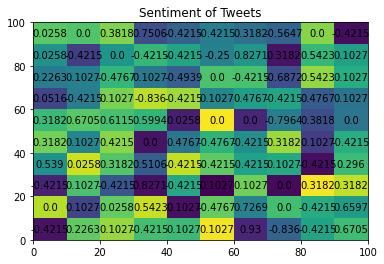

In [ ]:
#Tree Map

import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import squarify

# create the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# read the preprocessed tweet dataset from the CSV file
tweet_dataset = []
with open("sentiment_scores1.csv", "r") as csv_file:
    reader = csv.reader(csv_file)
    next(reader)  # skip the header row
    for row in reader:
        tweet_dataset.append(row[1])

# analyze the sentiment of each tweet
scores = []
for tweet in tweet_dataset:
    score = sia.polarity_scores(tweet)
    if score["compound"] > 0.5:
        scores.append(1)  # positive
    elif score["compound"] < -0.5:
        scores.append(-1)  # negative
    else:
        scores.append(0.1)  # neutral

# plot the tree map

squarify.plot(sizes=scores, label=tweet_dataset)
plt.title("Sentiment of Tweets")
plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


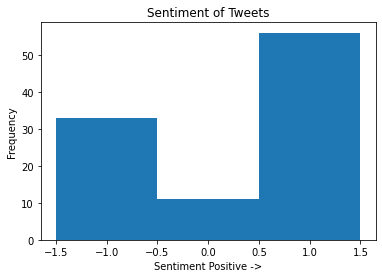

In [ ]:
#Histogram

import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# read the preprocessed tweet dataset from the CSV file
tweet_dataset = []
with open("sentiment_scores1.csv", "r") as csv_file:
    reader = csv.reader(csv_file)
    next(reader)  # skip the header row
    for row in reader:
        tweet_dataset.append(row[0])

# analyze the sentiment of each tweet
scores = []
for tweet in tweet_dataset:
    score = sia.polarity_scores(tweet)
    if score["compound"] > 0.5:
        scores.append(1)  # positive
    elif score["compound"] < -0.5:
        scores.append(-1)  # negative
    else:
        scores.append(0.1)  # neutral

# plot the histogram
plt.hist(scores, bins=[-1.5, -0.5, 0.5, 1.5])
plt.title("Sentiment of Tweets")
plt.xlabel("Sentiment Positive ->")
plt.ylabel("Frequency")
plt.show()


################################################################

Part 2 - Compairing Text 

################################################################

In [ ]:
import nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import tkinter as tk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Successfully Compaired

import nltk
from nltk.corpus import stopwords

# Open the predefined text file and read its contents
with open("answer1.txt", "r") as f:
    predefined_text = f.read()

# Prompt the user for the text to compare
user_text = input("Enter the text to compare: ")

# Split the predefined text and the user text into lists of words
predefined_words = predefined_text.split()
user_words = user_text.split()

# Get a list of English stopwords
stop_words = set(stopwords.words('english'))

# Initialize the score to 0
score = 0

# Initialize a list to store the matching words
matching_words = []

# Iterate through the words in the user text
for word in user_words:
    # If the word is in the predefined text and is not a stopword, increase the score by 1 and add the word to the list of matching words
    if word in predefined_words and word not in stop_words:
        score += 1.5
        matching_words.append(word)

# Calculate the percentage of similarity
percentage = round((score / len(predefined_words)) * 100,2)

# Print the percentage of similarity
print("The percentage of similarity is:", percentage)

# Print the matching words
for row in matching_words :
    for element in row:
        print(element, end='')
    print()
#print("The matching words are:", matching_words)


Enter the text to compare: artificial intelligence (AI), the ability of a digital computer or computer-controlled robot to perform tasks commonly associated with intelligent beings.
The percentage of similarity is: 39.62
artificial
intelligence
(AI),
ability
digital
computer
computer-controlled
robot
perform
tasks
commonly
associated
intelligent
beings.
